# 1. Business Understanding

# Description:

Las enfermedades cardiacas 

Heart disease is one of the biggest health problems each year. Each year more people die from cardiovascular disease (CVD) than from any other cause. More than three-fourths of deaths related to heart disease and stroke occur in low- and middle-income countries, representing a serious health problem in Latin American countries. It is also related to poor diet, sedentary and unhealthy lifestyles and smoking[<a href="https://scc.org.co/wp-content/uploads/2012/08/capitulo-1.pdf">1</a>, <a href="https://www.paho.org/es/temas/enfermedades-cardiovasculares">2</a>].

The main symptoms are [<a href="https://www.mayoclinic.org/diseases-conditions/heart-disease/symptoms-causes/syc-20353118">3</a>]:
* Chest pain, chest tightness, chest pressure and chest discomfort (angina)
* Shortness of breath
* Pain in the neck, jaw, throat, upper belly area or back
* Pain, numbness, weakness or coldness in the legs or arms if the blood vessels in those body areas are narrowed

To help health personnel around the world many initiatives for data collection, analysis of these data and creation of prediction and diagnosis models are created every year. With the rise of machine learning and artificial intelligence to support health models, many models for the diagnosis of these diseases based on probabilistic methods such as Bayesian, rule-based methods such as decision trees or data segmentation methods, both linear and non-linear such as support vector machines or those based on neural networks have been tested around the world and have proven their effectiveness[<a href="http://www.ripublication.com/acst17/acstv10n7_13.pdf">4</a>].

### Setup enviorment

In [ ]:
import pandas as pd

In [ ]:
#connect with drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set local path as:
%cd /content/drive/MyDrive/TIC en Salud/Week 3 - Data Analysis
!ls

/content/drive/MyDrive/TIC en Salud/Week 3 - Data Analysis
Crisp-dm_Covid.ipynb		ejemplo.png	  read_data.ipynb
Data				Graph_data.ipynb
Data_Understanding_covid.ipynb	Homework.ipynb


In [ ]:
# Path to datset
PATH = "Data/heart.csv"

# 2. Data Understanding

## Data Source:
<h5> <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/"> Source: UCI </a></h5>

## Variables:

Columns in order: 

1. age in years
2. sex: 1 = Male - 0 = Female
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar 1 Means values > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. Heart Disease: 1 = Heart Disease; 0 = healthy


### 2.1  Read The file

In [ ]:
# Read csv file
disease = pd.read_csv(PATH, sep=',')
# See file:
disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Show first n lines

In [ ]:
n = 3
disease.head(n)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


### Show last n lines

In [ ]:
n = 4
disease.tail(n)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


### Show shape of the file

In [ ]:
disease.shape

(303, 14)

### Get column names

In [ ]:
disease.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Get index

In [ ]:
disease.index

RangeIndex(start=0, stop=303, step=1)

### Choose an specific column

In [ ]:
# From the dataframe we will get the age
# Method 1:
disease.age
# Method 2:
disease['age']

0      63
1      37
2      41
3      56
4      57
       ..
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 303, dtype: int64

### Select more than one column

In [ ]:
columns = ['age', 'sex']
disease[columns]

,age,sex
0,63,1
1,37,1
2,41,0
3,56,1
4,57,0
...,...,...
298,57,0
299,45,1
300,68,1
301,57,1


### See data types

In [ ]:
disease.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

### Apply operations to a all rows in a specific column

In [ ]:
disease.age - 50

0      13
1     -13
2      -9
3       6
4       7
       ..
298     7
299    -5
300    18
301     7
302     7
Name: age, Length: 303, dtype: int64

### Operate trough columns

In [ ]:
disease.age - disease.chol

0     -170
1     -213
2     -163
3     -180
4     -297
      ... 
298   -184
299   -219
300   -125
301    -74
302   -179
Length: 303, dtype: int64

### See null values

In [ ]:
disease.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## 2.2. Statistics

In [ ]:
# Describe all numeric columns
disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# Average of the selected column
disease.age.mean()

54.366336633663366

In [ ]:
# Minimum value of the selected column
disease.age.min()

29

In [ ]:
# Maximum value of the selected column
disease.age.max()

77

In [ ]:
# Standard deviation of the selected column
disease.age.std()

9.082100989837857

### Remove columns

In [ ]:
# Remove multiple columns
disease.drop(columns=['cp', 'sex'], axis=1) #,inplace=True) # Inplace will apply the condition on the dataframe

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,145,233,1,0,150,0,2.3,0,0,1,1
1,37,130,250,0,1,187,0,3.5,0,0,2,1
2,41,130,204,0,0,172,0,1.4,2,0,2,1
3,56,120,236,0,1,178,0,0.8,2,0,2,1
4,57,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,0,1,123,1,0.2,1,0,3,0
299,45,110,264,0,1,132,0,1.2,1,0,3,0
300,68,144,193,1,1,141,0,3.4,1,2,3,0
301,57,130,131,0,1,115,1,1.2,1,1,3,0


### Remane:

In [ ]:
# Renombrar columnas en formato 'nombre_actual': 'nuevo_nombre'
disease.rename(columns={'age':'edad', 'sex':'sexo'}) #, inplace=True)

,edad,sexo,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Indexing

In [ ]:
# Choose values in target == 1
disease[disease.target == 1]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


### Index by name or value

In [ ]:
# use the loc method
# The format will be .loc[index_value, column_value]
disease.loc[[2, 4, 5, 302], 'sex']
# We can also apply logic gates
# or | , and &
disease.loc[(disease.target == 0) | (disease.sex == 0)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Index by position

In [ ]:
# Se usa el método iloc
# El formato será .iloc[posicion_de_indices, posicion_de_columnas]
disease.iloc[[2, 4, 5, 302], 1]

2      0
4      0
5      1
302    0
Name: sex, dtype: int64

### Group

In [ ]:
# To group, you must give the column based on which it will be grouped, in this case 'target'
# then we give the operation to apply (sum, count, mean, ...)
agrupado_por_target = disease.groupby('target').mean()
agrupado_por_target

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


### 2.3 Plot

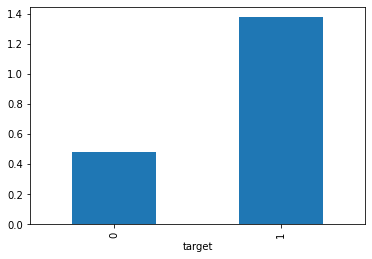

In [ ]:
# Plot the range of chest pain
# on the left healthy patients
# to the right sick patients
agrupado_por_target['cp'].plot.bar()

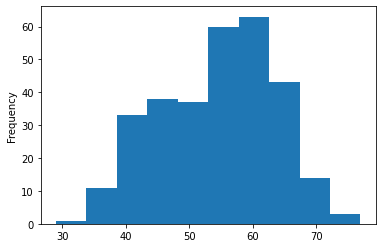

In [ ]:
# Plot histogram showing the distribution of ages in the sample
disease['age'].plot.hist()

# Plots

## Matplotlib

### 2D Dot plot

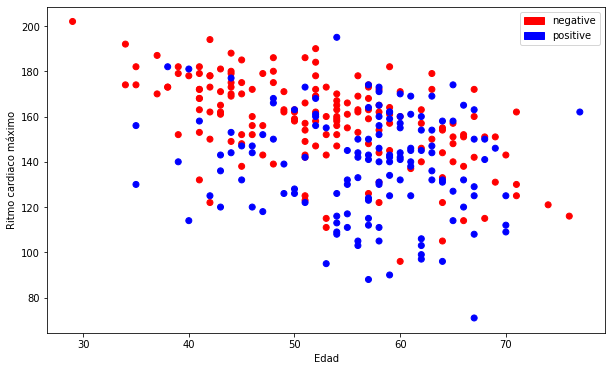

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create the figure
plt.figure(figsize=(10, 6))

# Create dictionary of type class : color
colores = {0:'red', 1:'blue'}

# Plot dot plot
plt.scatter(x=disease.age, y = disease.thalach, c=disease.target.map(colores))
plt.xlabel('Age')
plt.ylabel('Maximum heart rate')

# We add the labels with information about the graphs
red_patch = mpatches.Patch(color='red', label='negative')
blue_patch = mpatches.Patch(color='blue', label='positive')

plt.legend(handles=[red_patch, blue_patch])

# Save plot
plt.savefig('example.png')

# Show plot
plt.show()

### 3D Dot plot

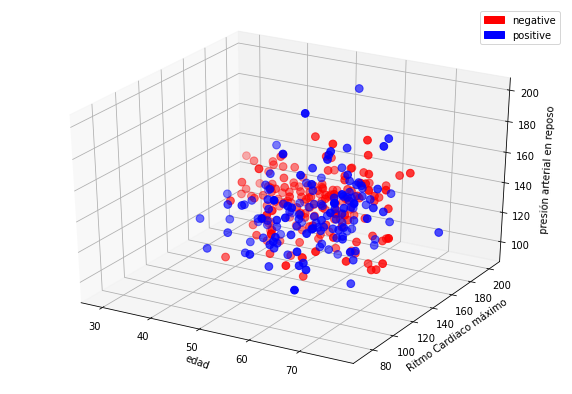

In [ ]:
# Create the figure
fig = plt.figure(figsize=(10,7))

# Define the projection of the figure (3D)
ax = fig.add_subplot(111, projection='3d')

# As it is 3D it requires 3 axes and the colors are given by the classes
ax.scatter(xs=disease.age, ys=disease.thalach, zs=disease.trestbps, c=disease.target.map(colores), s=60)

# Define 'x', 'y' and 'z' axis
ax.set_xlabel('Age', fontsize=10, rotation=-20)
ax.set_ylabel('Maximum heart rate', fontsize=10, rotation=30)
ax.set_zlabel('Resting blood pressure', fontsize=10, rotation=87)

# Red negative 
# Blue positive
red_patch = mpatches.Patch(color='red', label='negative')
blue_patch = mpatches.Patch(color='blue', label='positive')

plt.legend(handles=[red_patch, blue_patch])


# Show
plt.show()

## Seabron

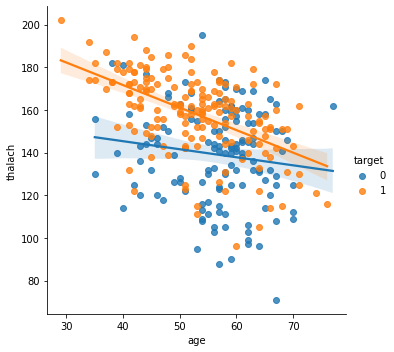

In [ ]:
# Import seaborn as sns
import seaborn as sns
# Show dot plot
sns.lmplot(x='age', y='thalach', data=disease, hue='target', fit_reg=True)

## Histogram

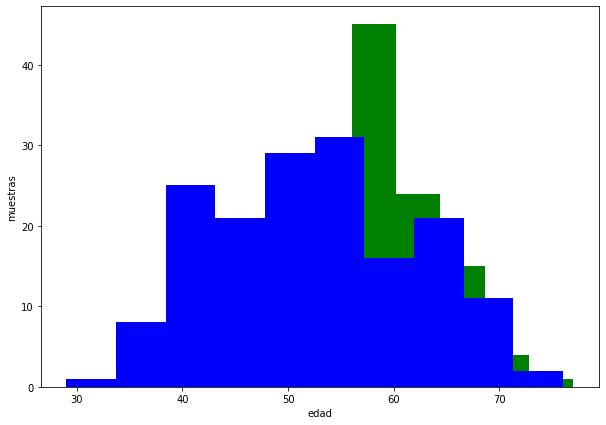

In [ ]:
plt.figure(figsize=(10,7))

plt.hist(disease.age[disease.target == 0],color='green')

plt.hist(disease.age[disease.target == 1],color='blue')

plt.ylabel('Samples')
plt.xlabel('age')

plt.show()

[Text(0, 0.5, 'muestras'), Text(0.5, 0, 'edad')]

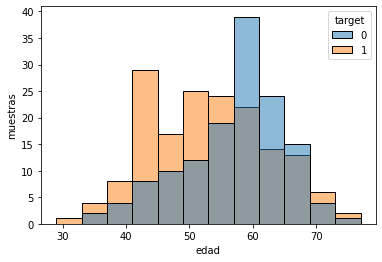

In [ ]:
ax = sns.histplot(data=disease, x="age", hue="target")
ax.set(xlabel='age', ylabel='samples')

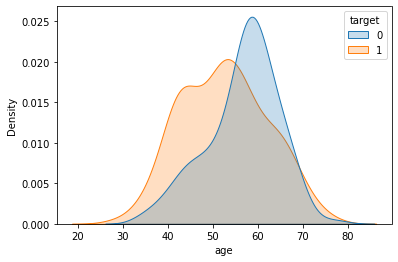

In [ ]:
sns.kdeplot(data=disease, x="age", hue="target", shade=True)

### Box and whiskers

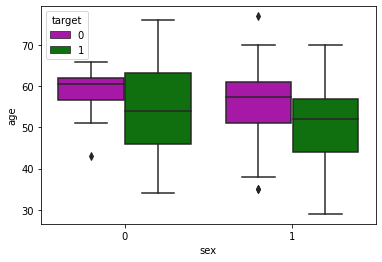

In [ ]:
sns.boxplot(x='sex', y='age',
            hue="target", palette=["m", "g"],
            data=disease)

## Pie Chart

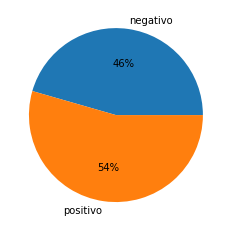

In [ ]:
disease_group = disease.groupby('target').count()

plt.pie(disease_group.iloc[:,0], labels=['negative', 'positive'], autopct='%.0f%%')
plt.show()

# Heat Map

In [ ]:
def matriz_correlacion(df):
    # Calculate correlation
    corr = df.corr(method='pearson')
    # plot size
    plt.figure(figsize=(15, 8))
    # Show plots
    sns.heatmap(corr, annot=True)
    plt.show()

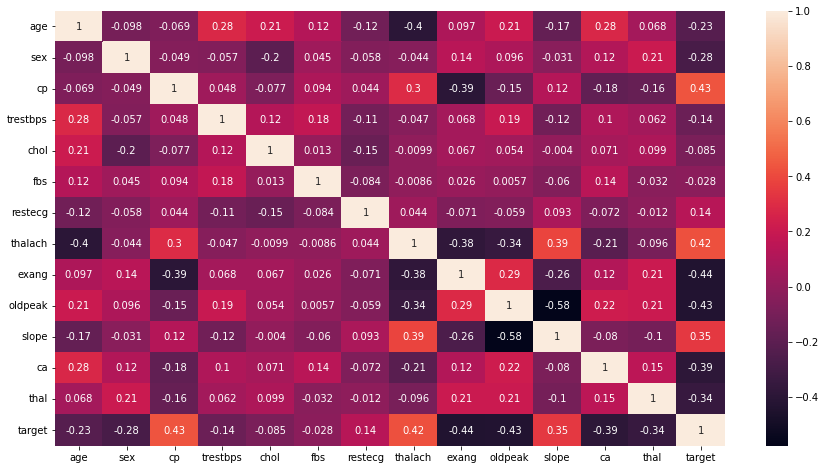

In [ ]:
# Calculate the matrix
matriz_correlacion(disease)

# All

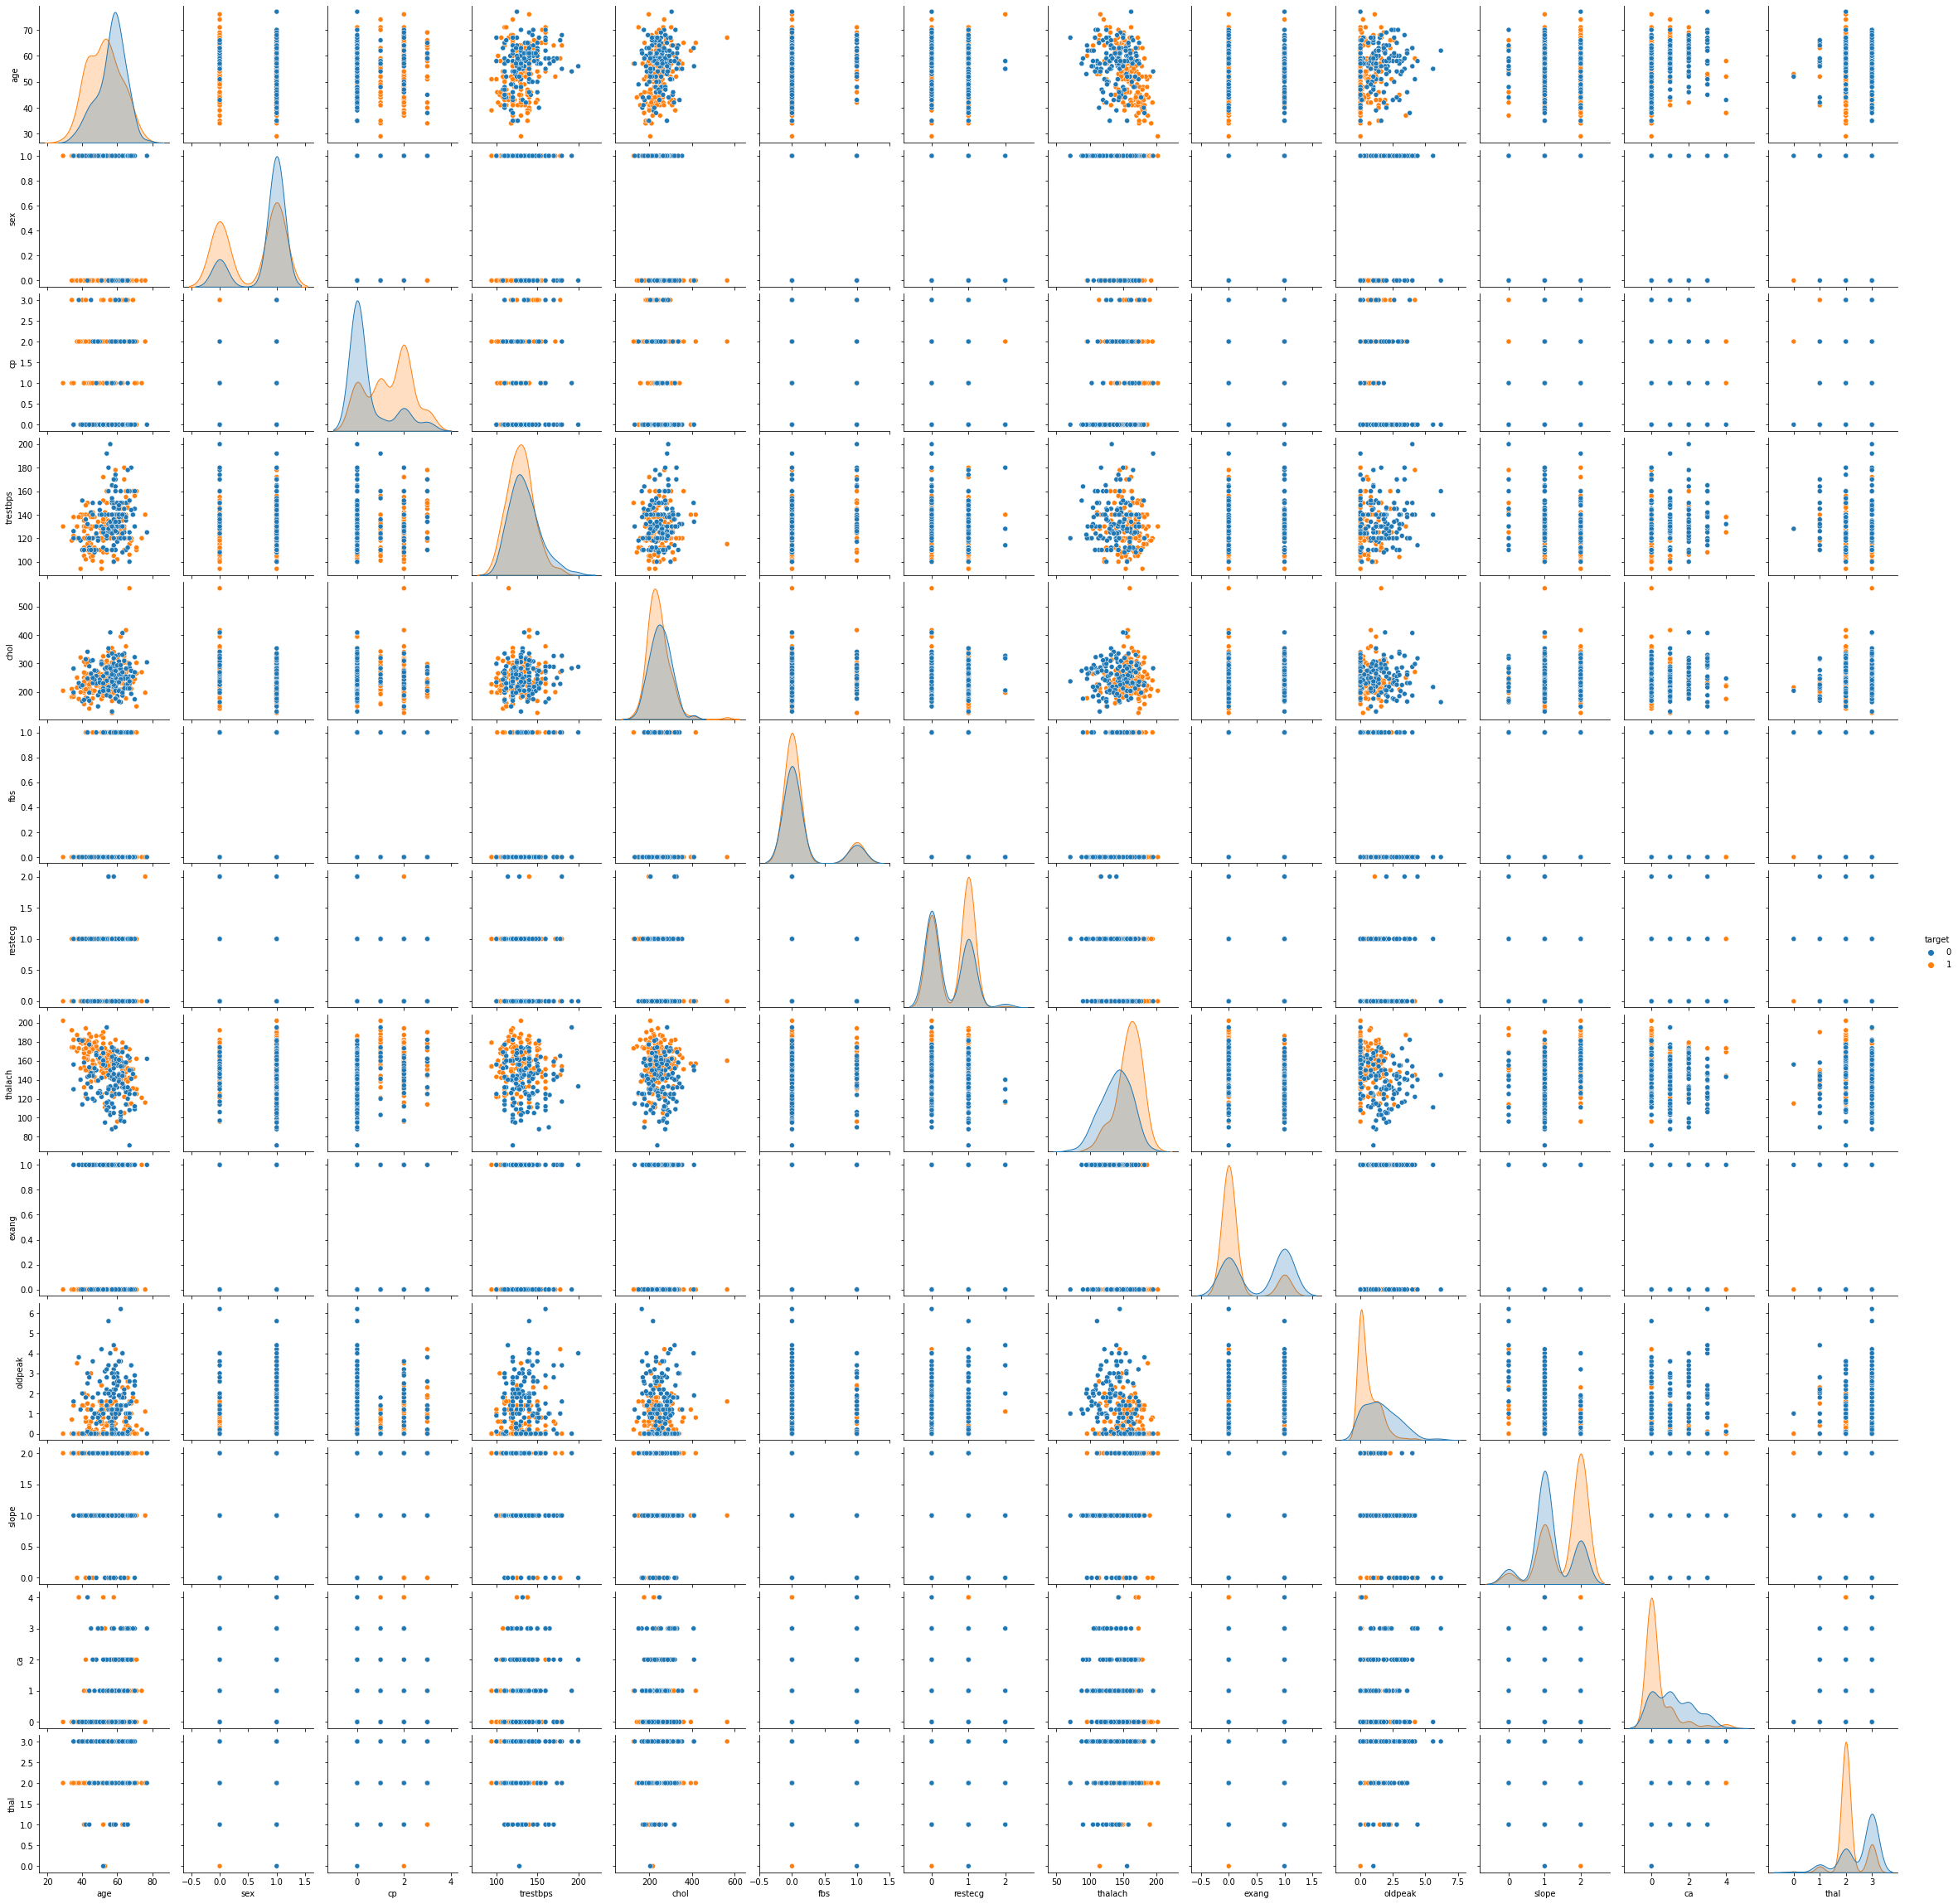

In [ ]:
sns.pairplot(disease, hue="target")